+++
notebook = true
title = "Implementation of Hoek-Brown Failure Criterion in MFront"
date = "2023-11-15"
author = "Mehran Ghasabeh, Dmitri Naumov, Thomas Nagel"
web_subsection = "small-deformations"
+++


<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./HoekBrownYieldCriterion.ipynb" download="HoekBrownYieldCriterion.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=HoekBrownYieldCriterion.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/Mechanics/HoekBrown/HoekBrownYieldCriterion.py"><img src="https://img.shields.io/static/v1?label=Source:&message=HoekBrownYieldCriterion.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/master?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/Mechanics/HoekBrown/HoekBrownYieldCriterion.py%26branch=master%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>

|<div style="width:330px"><img src="https://www.ufz.de/static/custom/weblayout/DefaultInternetLayout/img/logos/ufz_transparent_de_blue.png" width="300"/></div>|<div style="width:330px"><img src="https://discourse.opengeosys.org/uploads/default/original/1X/a288c27cc8f73e6830ad98b8729637a260ce3490.png" width="300"/></div>|<div style="width:330px"><img src="https://upload.wikimedia.org/wikipedia/commons/e/e8/TUBAF_Logo.svg" width="300"/></div>|
|---|---|--:|

The generalized Hoek-Brown model, proposed in the work of Hoek and Brown in 1980 [1, 2], is derived based on the results of the brittle failure of intact rock [3] and the model studies of jointed rock mass behaviour [4].
One of the remarkable priorities of the Hoek-Brown failure criterion over other criteria in the literature is that the strength and the deformation characteristics of heavily jointed rock masses can be evaluated regarding the geological strength index (GSI) as the information representing the field observation effects on the mechanical properties of a rock mass, such as the structure (or blockiness) and the condition of the joints [5].
The GSI was introduced based on Bieniawski`s rock mass rating (RMR) system [6] and the Q-system [7].
The GSI ranges from about $10$ for extremely poor rock masses to $100$ for intact rock.

The generalized Hoek-Brown criterion for the estimation of rock mass strength is expressed as

$$
    F_{\text{HB}} = \sigma_{1} - \sigma_{3} \ - \sigma_{\text{ci}} \  \left(s - m_b \cfrac{\sigma_{1}}{\sigma_{\text{ci}}}\right)^{a} = 0
    \tag{1}
$$

where $\sigma_{1} \geq \sigma_{2} \geq \sigma_{3}$  are the effective principal stresses, and the material constants $m_b$, $s$, and $a$ are determined as a function of the GSI:

$$
    m_b = m_i \exp \left( \cfrac{\text{GSI}-100}{28-14D} \right), \quad s=\exp\left(\cfrac{\text{GSI}-100}{9-3D}\right) \quad \text{and} \quad a=\cfrac{1}{2}+\cfrac{1}{6}\left( \exp \left(-\cfrac{\text{GSI}}{15}\right) - \exp\left(-\cfrac{20}{3} \right)\right).
    \tag{2}
$$

The parameter $D$ is a factor that represents the degree of disturbance in the rock masses.
The suggested value of the disturbance factor is $D=0$ for undisturbed in situ rock masses and $D=1$ for disturbed rock mass properties.

In order to comprehensively analyze the behaviour of a slope, foundation, or tunnel, it is necessary to estimate not only the strength of intact rock and rock masses but also the deformation modulus of the rock mass in which these structures are excavated.
The following equation is proposed for evaluating rock mass modulus based on the database of rock mass deformation modulus measurements [8]

$$
    E_{\text{rm}} = E_i \left(0.02 + \cfrac{1- D / 2}{1 + \exp\left(\left(60+15D-\text{GSI}\right)/11\right)} \right)  \quad (\text{MPa}),
    \tag{3}
$$

where $E_i$ denotes the intact rock deformation modulus (MPa).
However, when the laboratory-measured values for $E_i$ are not available, the following alternative expression is used to calculate the rock mass modulus $E_{\text{rm}}$ [8]

$$
    E_{\text{rm}} = \left(\cfrac{1- D / 2}{1 + \exp\left(\left(75+25D-\text{GSI}\right)/11\right)} \right)  \quad (\text{MPa}).
    \tag{4}
$$

The generalized Hoek-Brown criterion is expressed in terms of stress invariants ($I_1$ and $J_2$) is given by

$$
    F_{\text{HB}}= - m_b  \ p \ \sigma_{\text{ci}} ^ {1/a -1} + (2 \ \sqrt {J_2} \ \cos \theta)^{1/a} + m_b \ \sqrt{J_2} \ \sigma_{\text{ci}}^{1/a - 1} \left( \cos \theta - \cfrac{\sin \theta}{\sqrt{3}} \right) - s \ \sigma_{\text{ci}}^{1/a} = 0 \quad \text{with} \quad p = -\dfrac{1}{3} \ I_1.
    \tag{5}
$$

However, this model presents computational challenges as a result of gradient discontinuities that show up at both the edges and apex of the hexagonal yield surface pyramid.
These singularities frequently result in inefficient or failed stress integration schemes.
In the current work, a straightforward hyperbolic yield surface is introduced, eliminating the singular apex in the meridian plane.
Furthermore, a modified yield surface is developed based on a hyperbolic approximation with the octahedral rounding technique proposed in the work of Sloan and Booker [9], which is further adapted to the Mohr-Coulomb yield surface in the work of Abbo et al. [10], and Nagel et al. [11].
To this, following the $C_2$ continuous smoothing approach explained in [12], the modified expression of the Hoek-Brown yield function is proposed as follows

$$
    F_{\text{HB}}^{C_2}
    = - m_b \ p \ \sigma_{\text{ci}} ^ {1/a -1}
    + m_b \ \sqrt{J_2} \ \sigma_{\text{ci}}^{1/a - 1}
    \left( A + B \sin{3 \theta} + C \sin^2{3 \theta}\right)- s \ \sigma_{\text{ci}}^{1/a} = 0.
    \tag{6}
$$

This modified yield function is applied when the Lode angle is greater than or equal to the transition angle ($\theta \ge \theta_{T}$).
The modified yield function is continuous and differentiable with respect to the stresses if the following conditions hold.
These conditions are used to derive the coefficients $A$, $B$ and $C$ in (6):

i) At a transition point, the $J_2$ invariant for the modified surface is identical to the $J_2$ invariant for the Mohr-Coulomb surface.

ii) At a transition point, the derivative of the $J_2$ invariant with respect to the Lode angle $\theta$ for the modified surface is identical to one for the generalized Hoek-Brown surface.

iii) The modified surface must be convex and definite, so at $\theta = \pm \pi / 6$, the derivative of the $J_2$ invariant with respect to the Lode angle is $0$.

Moreover, the singularities and the corresponding difficulties of the derivation at the apex of the yield surface are resolved by adopting a quasi-hyperbolic approximation [11].
To this end, the smoothing approach is applied by permuting $J_2$ with a small term $\epsilon$ according to $\hat{J}_2 = \sqrt{J_2 + \epsilon^2}$ in the yield surface function.
The permutation parameter $\epsilon$ is determined by the following rule at $\theta=0$

$$
    \epsilon = \text{min} \left( \delta, \mu \sqrt{J_2} \ | \ (2 \ \sqrt {J_2} \ )^{1/a} + m_b \ \sqrt{J_2} \ \sigma_{\text{ci}}^{1/a - 1}  - s \ \sigma_{\text{ci}}^{1/a} = 0 \right)
    \quad \text{with} \quad \delta = 10^{-6} \quad \text{and} \quad \mu = 10^{-1}.
    \tag{7}
$$

For the nonassociated material behaviour, a plastic potential with an analogous structure to the yield function but different dilation-controlling parameters is defined by [13]

$$
    G_{\text{HB}}=
    - m_g  \ p \ \sigma_{\text{ci}} ^ {1/a_g -1} + (2 \ \sqrt {J_2} \ \cos \theta)^{1/a_g} + m_g \ \sqrt{J_2} \ \sigma_{\text{ci}}^{1/a - 1} \left( \cos \theta - \cfrac{\sin \theta}{\sqrt{3}} \right) - s_g \ \sigma_{\text{ci}}^{1/a_g} = 0,
    \tag{8}
$$

if $\theta \lt \pi/6$, and

$$
    G_{\text{HB}}=
    - m_g \ p \ \sigma_{\text{ci}} ^ {1/a_g -1} + m_g \ \sqrt{J_2} \ \sigma_{\text{ci}}^{1/a_g - 1} \left( A + B \sin{3 \theta} + C \sin^2{3 \theta}\right)- s_g \ \sigma_{\text{ci}}^{1/a_g} = 0,
    \tag{9}
$$

if $\theta \ge \pi/6$.

According to the potential function, the rock mass dilation and its rate are mainly controlled by the curvature parameter $a_g$ and the dilation parameter $m_g$.

The proposed formulation is then validated by capturing the $\pi$-plane for a set of material properties for an intact or massive rock mass with few widely spaced discontinuities with excellent quality control blasting or excavation by tunnel boring machine, i.e., $D=0$.
Then the model is applied to an average-quality rock mass, as explained in detail in [14].

In [1]:
import math as mt
import os
import shutil
from math import cos, pi, sin, sqrt
from pathlib import Path

import matplotlib.pyplot as plt
import mtest
import numpy as np
import ogstools as ot
import pandas as pd

# required for tfel::math::vector conversions
import tfel.math  # noqa: F401
import vtuIO
from IPython.display import Markdown, display
from matplotlib.ticker import MultipleLocator
from scipy.optimize import fsolve
from tfel.material import projectOnPiPlane

In [2]:
# Specify the folder names
calFolder_name = Path("calculatedData")
refFolder_name = Path("refData")

# Attempt to remove the folder
try:
    shutil.rmtree(calFolder_name)
    print(f"Folder '{calFolder_name}' has been successfully deleted.")
except FileNotFoundError:
    print(f"The folder '{calFolder_name}' does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")

# Create the folder if it doesn't exist
if not calFolder_name.exists():
    calFolder_name.mkdir(parents=True)

The folder 'calculatedData' does not exist.


In [3]:
file_path = [
    "calculated_piplane_data_Ex1.csv",
    "calculated_piplane_data_Ex2.csv",
    "calculated_CLT_data_Ex3.csv",
    "calculated_HLT_data_Ex4.csv",
    "calculated_data_Ex5.csv",
]

# Check if the file exists before attempting to delete
for file in map(Path, file_path):
    if file.exists():
        # Delete the file
        file.unlink()

In [4]:
mfront_behaviour_lib = os.environ["VIRTUAL_ENV"] + "/../lib/libOgsMFrontBehaviour.so"
print(mfront_behaviour_lib)

/var/lib/gitlab-runner/builds/geF4QCR1Z/0/ogs/build/release-all/.venv/../lib/libOgsMFrontBehaviour.so


In [5]:
plt.rcParams["lines.linewidth"] = 2.0
plt.rcParams["lines.color"] = "black"
plt.rcParams["legend.frameon"] = True
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.family"] = "serif"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["font.size"] = 16
plt.rcParams["axes.spines.right"] = True
plt.rcParams["axes.spines.top"] = True
plt.rcParams["axes.spines.left"] = True
plt.rcParams["axes.spines.bottom"] = True
plt.rcParams["axes.axisbelow"] = True
mtest.setVerboseMode(mtest.VerboseLevel.VERBOSE_QUIET)

## Error Analysis Function

In [6]:
def ErrorAnalysis(refFile, calFile, input1, input2, labelx, labely, tol):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5.5))
    file_path1 = refFolder_name / refFile
    file_path2 = calFolder_name / calFile

    df1 = pd.read_csv(file_path1)
    df2 = pd.read_csv(file_path2)

    # Check if the columns are the same in both DataFrames
    if not df1.columns.equals(df2.columns):
        msg = "Columns in the CSV files are not the same."
        raise ValueError(msg)

    # Check if the shape of the DataFrames is the same
    if df1.shape != df2.shape:
        msg = "Shapes of the CSV files are not the same."
        raise ValueError(msg)

    errors0 = df1[input1] - df2[input1]
    errors1 = df1[input2] - df2[input2]

    # Calculate mean absolute error (MAE)
    mae0 = abs(errors0).mean()
    mae1 = abs(errors1).mean()

    mean_error = np.mean([mae0, mae1])

    if abs(mae0) > 0.0:
        ax[0].set_ylim([errors0.min(), errors0.max()])
    ax[0].scatter(range(len(errors0)), errors0, alpha=0.7, label=labelx)
    ax[0].axhline(y=0, color="red", linestyle="--", label="Zero Error Line")

    if abs(mae1) > 0.0:
        ax[1].set_ylim([errors1.min(), errors1.max()])
    ax[1].scatter(range(len(errors1)), errors1, alpha=0.7, label=labely)
    ax[1].axhline(y=0, color="red", linestyle="--", label="Zero Error Line")

    # Customize the plot
    ax[0].set_xlabel("points")
    ax[0].set_ylabel("Error")
    ax[0].grid("both")
    ax[0].legend()

    ax[1].set_xlabel("points")
    ax[1].set_ylabel("Error")
    ax[1].grid("both")
    ax[1].legend()

    tolerance = tol

    # Check if the error exceeds the threshold
    if mean_error > tolerance:
        msg = (
            f"Error exceeds the threshold. Stopping the code. Mean Error: {mean_error}"
        )
        raise ValueError(msg)
    print("Continue with the rest of the code.", "Mean Error:", mean_error)

## Verifications

In [7]:
def run_pi_plane(theta, material_set, data, calFile):
    m_b = material_set["m_i"] * np.exp(
        (material_set["gsi"] - 100.0) / (28.0 - 14.0 * material_set["Df"])
    )
    sF = np.exp((material_set["gsi"] - 100.0) / (9 - 3.0 * material_set["Df"]))
    alphF = (1.0 / 2.0) + (1.0 / 6.0) * (
        np.exp(-material_set["gsi"] / 15.0) - np.exp(-20.0 / 3.0)
    )
    Ec = (
        (1.0 - material_set["Df"] / 2.0)
        / (1.0 + np.exp(65.0 + 15.0 * material_set["Df"] - material_set["gsi"]) / 11.0)
        + 0.02
    ) * material_set["Ei"]
    m_g = m_b * 2e-3
    sG = sF
    alphG = alphF

    def nonlinearEquation(J2):
        return (
            (2.0 * np.sqrt(J2)) ** (1.0 / alphF)
            + m_b * np.sqrt(J2) * material_set["sigma_ci"] ** (1.0 / alphF - 1.0)
            - sF * material_set["sigma_ci"] ** (1.0 / alphF)
        )

    # generate an initial guess
    initialGuess = 1e-3

    # solve the problem
    solutionInfo = fsolve(nonlinearEquation, initialGuess, full_output=1)
    Jtwo = sum(solutionInfo[0])
    rho = sqrt(Jtwo)
    npas = 100
    tmax = 1
    c = cos(theta)
    s = sin(theta)
    m = mtest.MTest()
    m.setMaximumNumberOfSubSteps(10)
    m.setBehaviour("generic", mfront_behaviour_lib, "HoekBrownC2")
    m.setExternalStateVariable("Temperature", 293.15)
    m.setImposedStrain("EXX", {0: 0, tmax: material_set["em"] * c})
    m.setImposedStrain("EYY", {0: 0, tmax: material_set["em"] * s})
    m.setNonLinearConstraint("SXX+SYY+SZZ", "Stress")
    m.setNonLinearConstraint("SXY", "Stress")
    m.setNonLinearConstraint("SXZ", "Stress")
    m.setNonLinearConstraint("SYZ", "Stress")
    m.setMaterialProperty("YoungModulus", Ec)
    m.setMaterialProperty("PoissonRatio", material_set["nu"])
    # Material Properties for the Yield Function
    m.setMaterialProperty("UniaxialCompressiveStrengthF", material_set["sigma_ci"])
    m.setMaterialProperty("CurveFittingParameterF", m_b)
    m.setMaterialProperty("ExponentF", alphF)
    m.setMaterialProperty("EstimatedParameterF", sF)
    m.setMaterialProperty("InitialJ2", rho)
    m.setMaterialProperty("J2TOL", material_set["delta_tol"])
    m.setMaterialProperty("TransitionAngle", material_set["lodeT"])
    # Material Properties for the Plastic Potential
    m.setMaterialProperty("UniaxialCompressiveStrengthG", material_set["sigma_ci"])
    m.setMaterialProperty("CurveFittingParameterG", m_g)
    m.setMaterialProperty("ExponentG", alphG)
    m.setMaterialProperty("EstimatedParameterG", sG)
    s = mtest.MTestCurrentState()
    wk = mtest.MTestWorkSpace()
    m.completeInitialisation()
    m.initializeCurrentState(s)
    m.initializeWorkSpace(wk)
    sigma_elx = np.array([0.0])
    sigma_ely = np.array([0.0])
    sigma_plx = np.array([0.0])
    sigma_ply = np.array([0.0])
    ltime = [float(tmax / (npas - 1)) * i for i in range(npas)]
    plas = 0
    plas_tol = 1e-10
    p = s.getInternalStateVariableValue("EquivalentPlasticStrain")
    for i in range(npas - 1):
        m.execute(s, wk, ltime[i], ltime[i + 1])
        p = s.getInternalStateVariableValue("EquivalentPlasticStrain")
        s0, s1 = projectOnPiPlane(s.s1[0], s.s1[1], s.s1[2])
        if p > plas_tol:
            sigma_elx = np.append(sigma_elx, 0.0)
            sigma_plx = np.append(sigma_plx, s0)
            sigma_ely = np.append(sigma_ely, 0.0)
            sigma_ply = np.append(sigma_ply, s1)
            data["sigma0"].append(s0)
            data["sigma1"].append(s1)
            plas += 1
            if plas > 1:
                break
        else:
            sigma_plx = np.append(sigma_plx, 0.0)
            sigma_elx = np.append(sigma_elx, s0)
            sigma_ply = np.append(sigma_ply, 0.0)
            sigma_ely = np.append(sigma_ely, s1)
    results_set = {
        "sigma_elx": sigma_elx,
        "sigma_ely": sigma_ely,
        "sigma_plx": sigma_plx,
        "sigma_ply": sigma_ply,
        "sF": sF,
        "alphF": alphF,
        "m_b": m_b,
    }
    pd.DataFrame(data).to_csv(calFolder_name / calFile, index=False)

    return results_set

In [8]:
dataEx1 = {"sigma0": [], "sigma1": []}
calFile = "calculated_piplane_data_Ex1.csv"

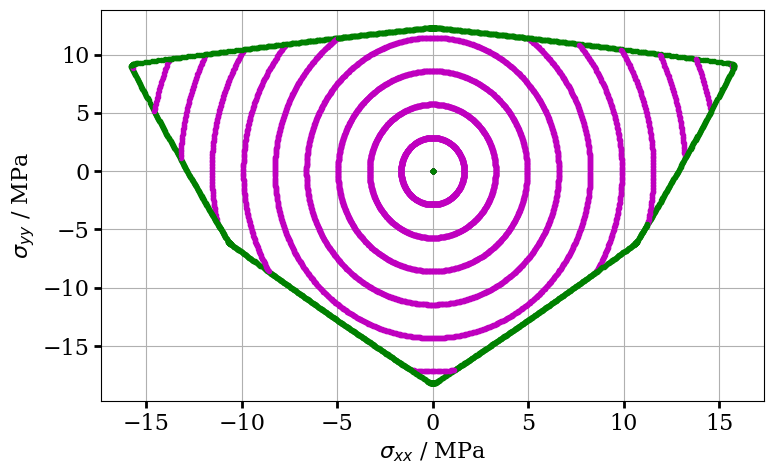

In [9]:
piResults_set1 = {}
material_set = {}
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_adjustable("datalim")
ax.set_aspect("auto", "box")
material_set = {
    "sigma_ci": 110.0,
    "sigma_cg": 110.0,
    "Ei": 3.85e4,
    "nu": 0.2,
    "m_i": 2.0,
    "Df": 0.0,
    "gsi": 80.0,
    "lodeT": 29.0,
    "em": 5e-3,
    "delta_tol": 1e-6,
}
divisions = 1000

for theta in [
    pi * (-1.0 + 2.0 * float(i) / (float(divisions) - 1.0)) for i in range(divisions)
]:
    piResults_set1 = run_pi_plane(theta, material_set, dataEx1, calFile)
    ax.plot(piResults_set1["sigma_elx"], piResults_set1["sigma_ely"], "m.")
    ax.plot(piResults_set1["sigma_plx"], piResults_set1["sigma_ply"], "g.")
ax.set_xlabel("$\\sigma_{xx}$ / MPa")
ax.set_ylabel("$\\sigma_{yy}$ / MPa")
ax.grid("both")
fig.tight_layout()
ax.tick_params(width=2, length=5)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(which="minor", width=2, length=3, color="k")

Continue with the rest of the code. Mean Error: 1.2138395488233414e-10


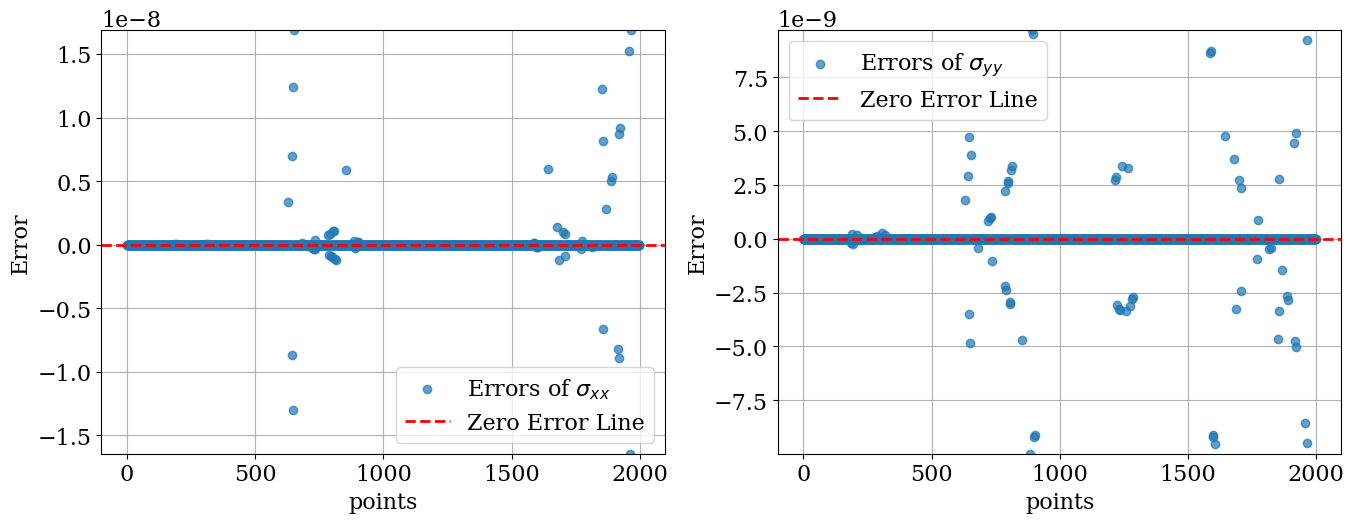

In [10]:
ErrorAnalysis(
    "reference_piplane_data_Ex1.csv",
    "calculated_piplane_data_Ex1.csv",
    "sigma0",
    "sigma1",
    r"Errors of $\sigma_{xx}$",
    r"Errors of $\sigma_{yy}$",
    tol=1e-6,
)

In [11]:
dataEx2 = {"sigma0": [], "sigma1": []}
calFile = "calculated_piplane_data_Ex2.csv"

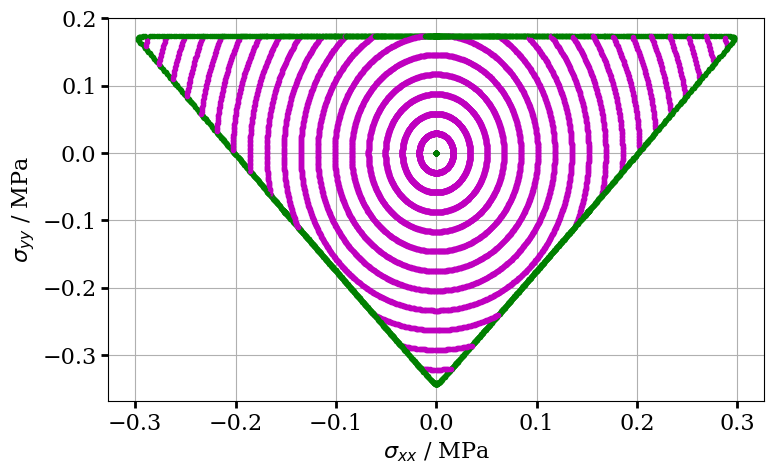

In [12]:
piResults_set2 = {}
material_set = {}
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_adjustable("datalim")
ax.set_aspect("auto", "box")
material_set = {
    "sigma_ci": 30.0,
    "sigma_cg": 30.0,
    "Ei": 1.071e4,
    "nu": 0.2,
    "m_i": 15.0,
    "Df": 0.0,
    "gsi": 65.0,
    "lodeT": 29.0,
    "em": 2e-4,
    "delta_tol": 1e-6,
}
divisions = 1000
for theta in [
    pi * (-1.0 + 2.0 * float(i) / (float(divisions) - 1.0)) for i in range(divisions)
]:
    piResults_set2 = run_pi_plane(theta, material_set, dataEx2, calFile)
    ax.plot(piResults_set2["sigma_elx"], piResults_set2["sigma_ely"], "m.")
    ax.plot(piResults_set2["sigma_plx"], piResults_set2["sigma_ply"], "g.")
ax.set_xlabel("$\\sigma_{xx}$ / MPa")
ax.set_ylabel("$\\sigma_{yy}$ / MPa")
ax.grid("both")
fig.tight_layout()
ax.tick_params(width=2, length=5)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(which="minor", width=2, length=3, color="k")

Continue with the rest of the code. Mean Error: 8.138680170750212e-11


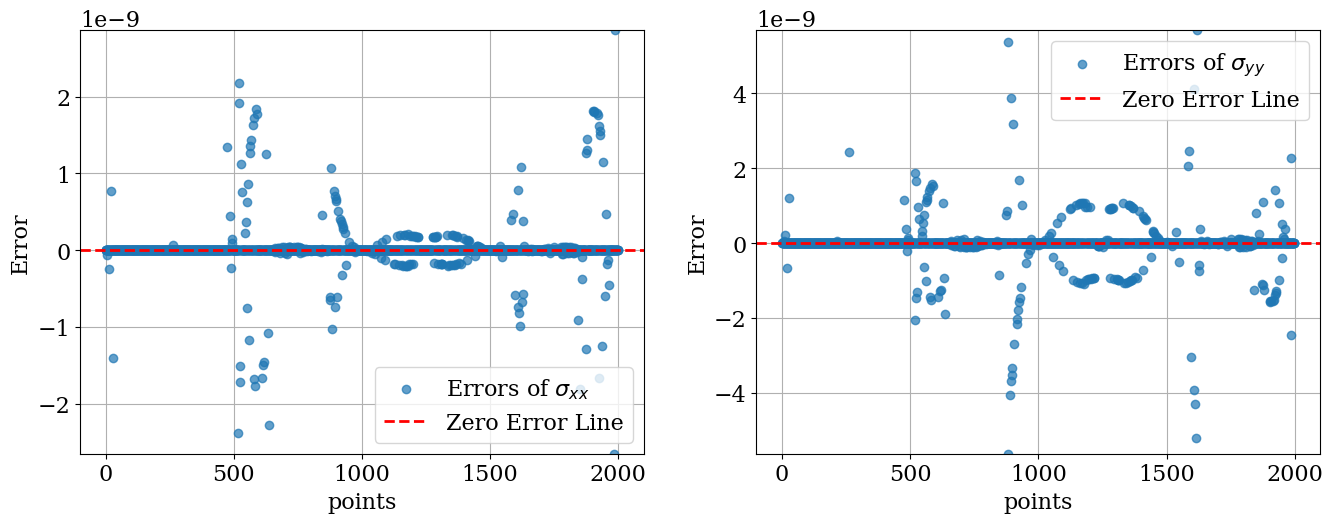

In [13]:
ErrorAnalysis(
    "reference_piplane_data_Ex2.csv",
    "calculated_piplane_data_Ex2.csv",
    "sigma0",
    "sigma1",
    r"Errors of $\sigma_{xx}$",
    r"Errors of $\sigma_{yy}$",
    tol=1e-6,
)

The yield function is approached along different stress paths within the $\pi$-plane.
This shows that yield is correctly detected, and the stress state is correctly pulled back onto the yield surface.

The tensile strength is calculated by setting $\sigma_1 = \sigma_2 = \sigma_3 = \sigma_t$ in (1) and calculated by
$$
    \sigma_t = s \cfrac{\sigma_{ci}}{m_b}.
    \tag{10}
$$

## Calculation of Tensile Strength

In [14]:
sigma_t = round(
    piResults_set2["sF"] / piResults_set2["m_b"] * (material_set["sigma_ci"]), 3
)

stress_t = f"$\\sigma_t = {sigma_t:2.3f}$ MPa"
display(Markdown(stress_t))

$\sigma_t = 0.143$ MPa

The compressive strength is obtained by setting $\sigma_1 = 0$ in (1), then we can calculate it by
$$
    \sigma_c = -\sigma_{ci} \ s^{a}.
    \tag{11}
$$

## Calculation of Compressive Strength

In [15]:
sigma_c = round(
    material_set["sigma_ci"] * piResults_set2["sF"] ** piResults_set2["alphF"], 3
)

stress_c = f"$\\sigma_c = {sigma_c:2.3f}$ MPa"
display(Markdown(stress_c))

$\sigma_c = 4.259$ MPa

The validity of the Hoek-Brown model implemented in MFront is confirmed by the conduct of compressive and hydrostatic loading tests, which aim to ascertain the analytically derived compressive strength ($\sigma_c$) and tensile strength ($\sigma_t$).

## Numerical Evaluation of Compressive and Hydrostatic Loading Tests

In [16]:
def runTest(material_set, data, calFile):
    m_b = material_set["m_i"] * np.exp(
        (material_set["gsi"] - 100.0) / (28.0 - 14.0 * material_set["Df"])
    )
    sF = np.exp((material_set["gsi"] - 100.0) / (9 - 3.0 * material_set["Df"]))
    alphF = (1.0 / 2.0) + (1.0 / 6.0) * (
        np.exp(-material_set["gsi"] / 15.0) - np.exp(-20.0 / 3.0)
    )
    Ec = (
        (1.0 - material_set["Df"] / 2.0)
        / (1.0 + np.exp(65.0 + 15.0 * material_set["Df"] - material_set["gsi"]) / 11.0)
        + 0.02
    ) * material_set["Ei"]
    m_g = m_b * 2e-3
    sG = sF
    alphG = alphF

    def nonlinearEquation(J2):
        return (
            (2.0 * np.sqrt(J2)) ** (1.0 / alphF)
            + m_b * np.sqrt(J2) * material_set["sigma_ci"] ** (1.0 / alphF - 1.0)
            - sF * material_set["sigma_ci"] ** (1.0 / alphF)
        )

    # generate an initial guess
    initialGuess = 1e-3

    # solve the problem
    solutionInfo = fsolve(nonlinearEquation, initialGuess, full_output=1)
    Jtwo = sum(solutionInfo[0])
    rho = sqrt(Jtwo)
    npas = 200
    tmax = 1
    m = mtest.MTest()
    m.setMaximumNumberOfSubSteps(10)
    m.setBehaviour("generic", mfront_behaviour_lib, "HoekBrownC2")
    m.setExternalStateVariable("Temperature", 293.15)
    m.setMaterialProperty("YoungModulus", Ec)
    m.setMaterialProperty("PoissonRatio", material_set["nu"])
    # Material Properties for the Yield Function
    m.setMaterialProperty("UniaxialCompressiveStrengthF", material_set["sigma_ci"])
    m.setMaterialProperty("CurveFittingParameterF", m_b)
    m.setMaterialProperty("ExponentF", alphF)
    m.setMaterialProperty("EstimatedParameterF", sF)
    m.setMaterialProperty("InitialJ2", rho)
    m.setMaterialProperty("J2TOL", material_set["delta_tol"])
    m.setMaterialProperty("TransitionAngle", material_set["lodeT"])
    # Material Properties for the Plastic Potential
    m.setMaterialProperty("UniaxialCompressiveStrengthG", material_set["sigma_cg"])
    m.setMaterialProperty("CurveFittingParameterG", m_g)
    m.setMaterialProperty("ExponentG", alphG)
    m.setMaterialProperty("EstimatedParameterG", sG)
    if material_set["Test"] == "Compressive Loading Test":
        m.setImposedStrain("EZZ", {0: 0, tmax: material_set["em"]})
        m.setImposedStrain("EXX", 0)
    if material_set["Test"] == "Hydrostatic Loading Test":
        m.setImposedStrain("EXX", {0: 0, tmax: material_set["em"]})
        m.setImposedStrain("EYY", {0: 0, tmax: material_set["em"]})
        m.setImposedStrain("EZZ", {0: 0, tmax: material_set["em"]})
    m.setNonLinearConstraint("SXY", "Stress")
    m.setNonLinearConstraint("SXZ", "Stress")
    m.setNonLinearConstraint("SYZ", "Stress")
    s = mtest.MTestCurrentState()
    wk = mtest.MTestWorkSpace()
    m.completeInitialisation()
    m.initializeCurrentState(s)
    m.initializeWorkSpace(wk)
    eps_xx = np.array([0.0])
    eps_yy = np.array([0.0])
    eps_zz = np.array([0.0])
    sig_xx = np.array([0.0])
    sig_yy = np.array([0.0])
    sig_zz = np.array([0.0])
    ltime = [float(tmax / (npas - 1)) * i for i in range(npas)]
    for i in range(npas - 1):
        m.execute(s, wk, ltime[i], ltime[i + 1])
        eps_xx = np.append(eps_xx, s.e1[0])
        sig_xx = np.append(sig_xx, s.s1[0])
        eps_yy = np.append(eps_yy, s.e1[1])
        sig_yy = np.append(sig_yy, s.s1[1])
        eps_zz = np.append(eps_zz, s.e1[2])
        sig_zz = np.append(sig_zz, s.s1[2])
        if material_set["Test"] == "Compressive Loading Test":
            data["epsilon2"].append(s.e1[2] * 100.0)
            data["sigma2"].append(s.s1[2])
        if material_set["Test"] == "Hydrostatic Loading Test":
            data["epsvol"].append((s.e1[0] + s.e1[1] + s.e1[2]) * 100.0)
            data["p"].append(-(s.s1[0] + s.s1[1] + s.s1[2]) / 3.0)
        results_set = {
            "eps_xx": eps_xx,
            "sig_xx": sig_xx,
            "eps_yy": eps_yy,
            "sig_yy": sig_yy,
            "eps_zz": eps_zz,
            "sig_zz": sig_zz,
            "Ec": Ec,
        }
    if material_set["Test"] == "Compressive Loading Test":
        pd.DataFrame(data).to_csv(calFolder_name / calFile, index=False)
    if material_set["Test"] == "Hydrostatic Loading Test":
        pd.DataFrame(data).to_csv(calFolder_name / calFile, index=False)
    return results_set

## Compressive Loading Test

In [17]:
dataEx3 = {"epsilon2": [], "sigma2": []}
calFile = "calculated_CLT_data_Ex3.csv"

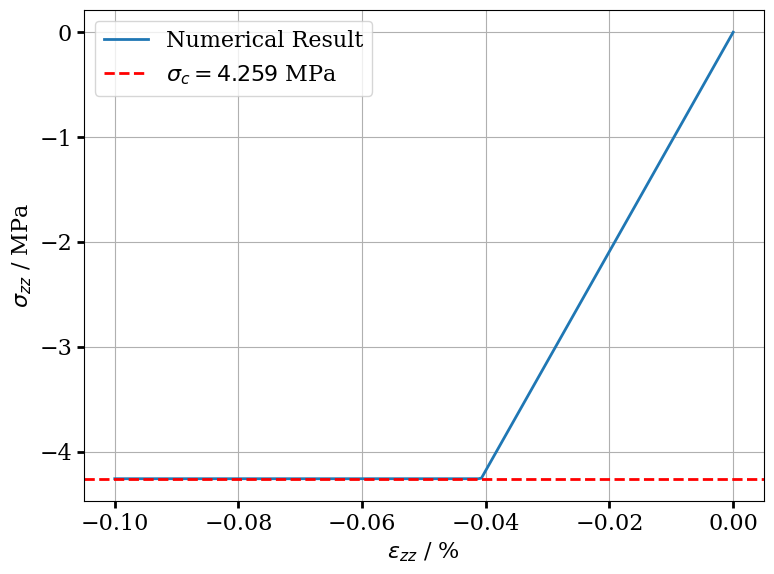

In [18]:
results_set1 = {}
material_set = {}
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_adjustable("datalim")
ax.set_aspect("auto", "box")
material_set = {
    "sigma_ci": 30.0,
    "sigma_cg": 30.0,
    "Ei": 1.071e4,
    "nu": 0.2,
    "m_i": 15.0,
    "Df": 0.0,
    "gsi": 65.0,
    "lodeT": 29.0,
    "em": -1e-3,
    "delta_tol": 1e-6,
    "Test": "Compressive Loading Test",
}
flgt = 1
results_set1 = runTest(material_set, dataEx3, calFile)
ax.plot(
    results_set1["eps_zz"] * 100.0,
    results_set1["sig_zz"],
    "-",
    label="Numerical Result",
)
ax.set_xlabel("$\\epsilon_{zz}$ / % ")
ax.set_ylabel("$\\sigma_{zz}$ / MPa")
ax.grid("both")
fig.tight_layout()
ax.tick_params(width=2, length=5)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(which="minor", width=2, length=3, color="k")
ax.axhline(
    y=-sigma_c, color="r", linestyle="--", label=f"$\\sigma_c = {sigma_c:2.3f}$ MPa"
)
ax.legend()

Continue with the rest of the code. Mean Error: 1.0755700227724417e-09


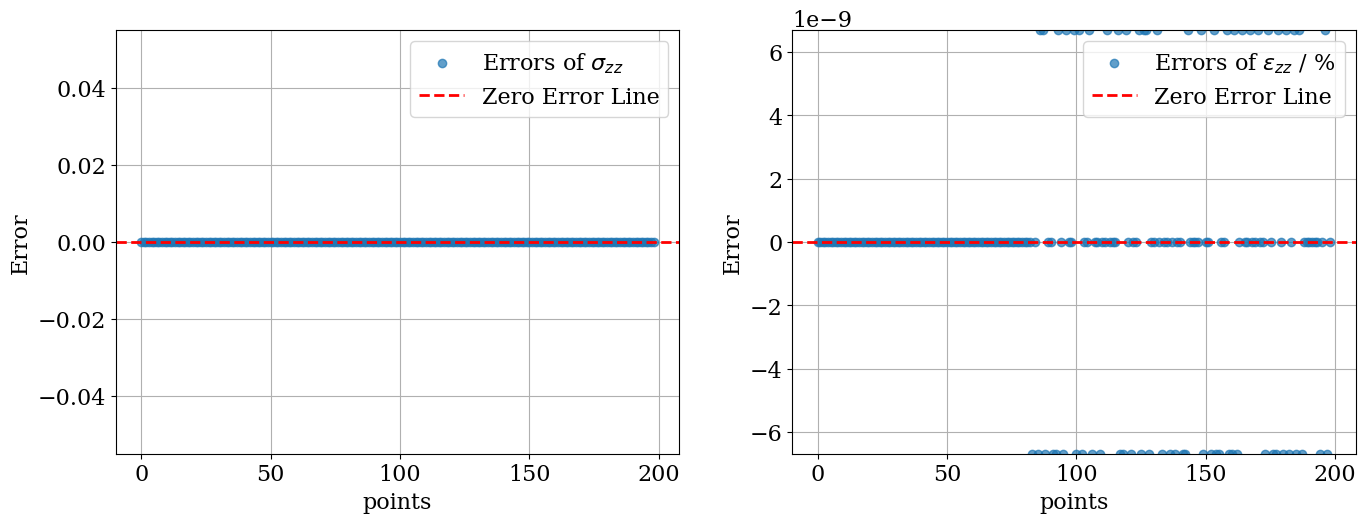

In [19]:
ErrorAnalysis(
    "reference_CLT_data_Ex3.csv",
    "calculated_CLT_data_Ex3.csv",
    "epsilon2",
    "sigma2",
    r"Errors of $\sigma_{zz}$",
    r"Errors of $\epsilon_{zz}$ / %",
    tol=1e-6,
)

## Hydrostatic Loading Test

This part validates the hydrostatic loading test by using analytically derived solutions.
To this end, it is necessary to determine the bulk modulus and then the elastic limit, which indicates the point at which the material starts to undergo plastic deformation.

In [20]:
# Calculate the analytical solution to the hydrostatic loading test
def analytical_solution(epst, sigma_t, bulkModulus):
    def stressStrain(strain, bulkModulus):
        return bulkModulus * strain

    stress_start = 0
    stress_end = sigma_t
    strain = np.linspace(stress_start / bulkModulus, stress_end / bulkModulus, 20)
    stress = stressStrain(strain, bulkModulus)
    ax.plot(
        strain * 100.0,
        stress,
        label="Linear Elastic Response",
        color="r",
        linestyle="--",
        marker="D",
    )
    if strain.any() > epst:
        ax.axhline(y=sigma_t, color="r", linestyle="--")

In [21]:
# Calculate the bulk modulus
def BulkModulus(results_set, material_set):
    return results_set["Ec"] / (3.0 * (1.0 - 2.0 * material_set["nu"]))

In [22]:
# Calculate the pressure
def pressure(results_set):
    return (
        -(results_set["sig_xx"] + results_set["sig_yy"] + results_set["sig_zz"]) / 3.0
    )

In [23]:
# Calculate the elastic limit
def elasticLimit(sigma_t, bulkModulus):
    return sigma_t / bulkModulus * 100.0

In [24]:
dataEx4 = {"epsvol": [], "p": []}
calFile = "calculated_HLT_data_Ex4.csv"

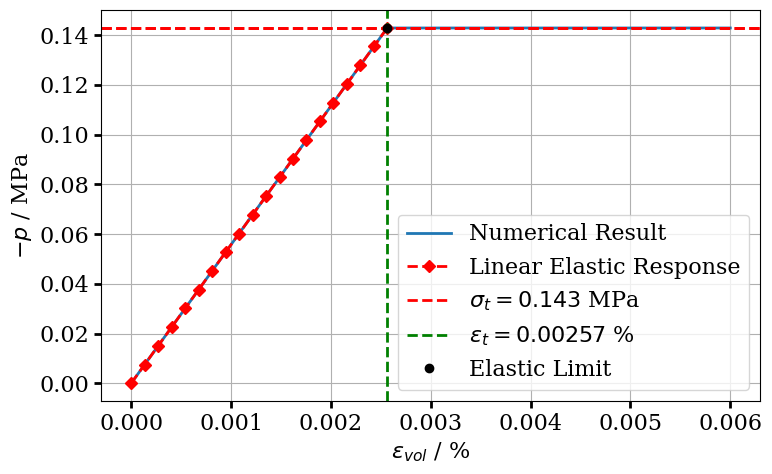

In [25]:
results_set2 = {}
material_set = {}
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_adjustable("datalim")
ax.set_aspect("auto", "box")
material_set = {
    "sigma_ci": 30.0,
    "sigma_cg": 30.0,
    "Ei": 1.071e4,
    "nu": 0.2,
    "m_i": 15.0,
    "Df": 0.0,
    "gsi": 65.0,
    "lodeT": 29.0,
    "em": 2e-5,
    "delta_tol": 1e-6,
    "Test": "Hydrostatic Loading Test",
}
results_set2 = runTest(material_set, dataEx4, calFile)
bulkModulus = BulkModulus(results_set2, material_set)
p = pressure(results_set2)
ax.plot(
    (results_set2["eps_xx"] + results_set2["eps_yy"] + results_set2["eps_zz"]) * 100,
    -p,
    "-",
    label="Numerical Result",
)
epst = elasticLimit(sigma_t, bulkModulus)

analytical_solution(epst, sigma_t, bulkModulus)

ax.axhline(
    y=sigma_t, color="r", linestyle="--", label=f"$\\sigma_t = {sigma_t:2.3f}$ MPa"
)

ax.axvline(
    x=epst,
    color="g",
    linestyle="--",
    label=f"$\\epsilon_t = {epst:2.5f}$ %",
)
ax.plot(epst, sigma_t, "ko", label="Elastic Limit")
ax.set_xlabel("$\\epsilon_{vol}$ / %")
ax.set_ylabel("$-p$ / MPa")
ax.grid("both")
fig.tight_layout()
ax.tick_params(width=2, length=5)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(which="minor", width=2, length=3, color="k")
ax.legend()

Continue with the rest of the code. Mean Error: 4.324018236056155e-08


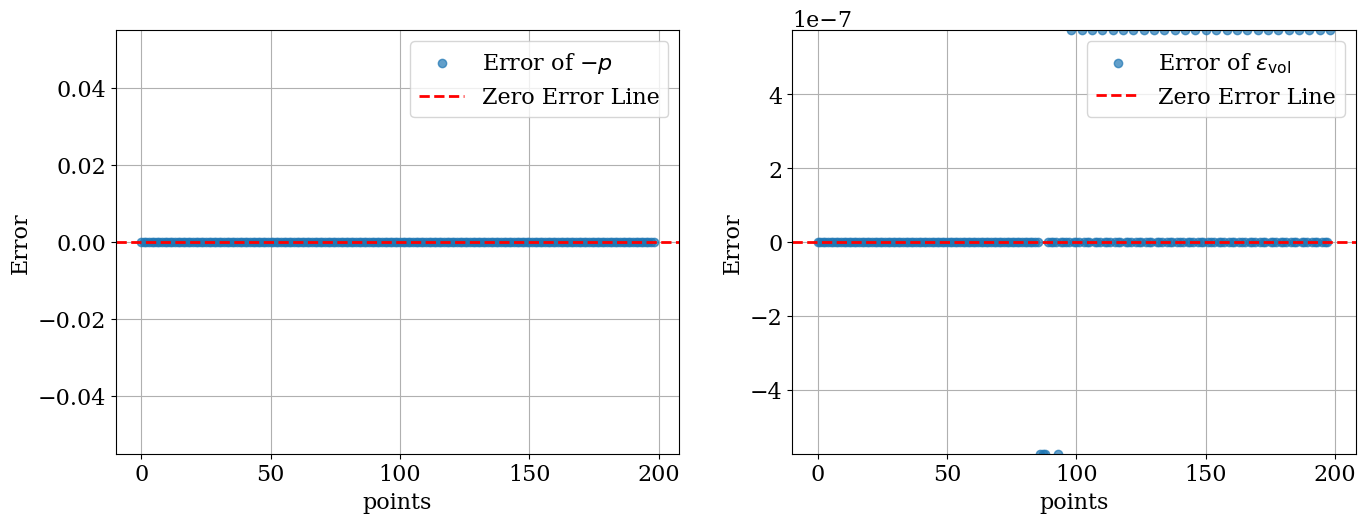

In [26]:
ErrorAnalysis(
    "reference_HLT_data_Ex4.csv",
    "calculated_HLT_data_Ex4.csv",
    "epsvol",
    "p",
    "Error of $-p$",
    "Error of $\\epsilon_{\\text{vol}}$",
    tol=1e-6,
)

## Elastoplastic Response of a Circular Hole to Cyclic Loading

In this example, the Hoek-Brown model implemented based on the $C_2$ continuous approach is applied to a circular hole under cyclic loading and compare the results in terms of the radial and tangential stresses with the analytical solutions.
The analytical solution for this problem is provided by the work of Carranza-Torres and Fairhurst [15].
We consider a cylindrical hole with a radius of $r$, which is subjected to an in-situ uniform stress field of $\sigma_0$, and an internal pressure of $p_i$.
The scaled far-field stresses, $S_0$, and scaled internal pressure, $P_0$, are determined by the following two equations, respectively

$$
    S_0 = \frac{\sigma_0}{m_b \sigma_0} + \frac{s}{m_b ^ 2}, \quad \text{and} \quad P_i = \frac{P_0}{m_b \sigma_0} + \frac{s}{m_b ^ 2}.
    \tag{12}
$$

The elastic limit of rock mass is determined by the scaled far-field stress ($S_0$) and the corresponding scaled (dimensionless) critical internal pressure ($P^{\text{cr}}_i$) is calculated as

$$
    P_{i}^{\text{cr}} = \frac{1}{16} \left(1 - \sqrt{1 + 16 S_0} \right)^2.
    \tag{13}
$$

Then, the critical internal pressure, $p^{\text{cr}}_i$ , is given by

$$
    p_{i}^{\text{cr}} = \left( P_{i}^{\text{cr}}
    - \frac{s}{m_{b} ^ {2}} \right) m_b \sigma_{\text{ci}}.
    \tag{14}
$$

The plastic region grows equally around the hole. The failure zone reaches to

$$
    b_{\text{pl}} = b \exp \left( 2 \sqrt{P_{i}^{\text{cr}}} - \sqrt{P_i} \right).
    \tag{15}
$$

In the plastic region where $r < b_{\text{pl}}$, the solutions for the radial and the tangential stresses are calculated as follows, respectively

$$
    \sigma_r(r) = \left( S_r (r) - \frac{s}{m_b ^2} \right) m_b \sigma_{\text{ci}},
    \quad \text{and} \quad
    \sigma_{\theta}(r) = \left( S_{\theta} (r) - \frac{s}{m_b ^2} \right) m_b \sigma_{\text{ci}},
    \tag{16}
$$

where $S_r$ and $S_{\theta}$ are correspondingly given by

$$
    S_r(r) = \left( \sqrt{P_{i}^{\text{cr}}} + \frac{1}{2} \ln \left( \frac{r}{b_{\text{pl}}} \right) \right)^2,
    \quad \text{and} \quad
    S_{\theta}(\theta) = \sqrt{S_{r}(r)} + S_r(r).
    \tag{17}
$$

The solutions for the radial and the tangential stresses in the elastic region are calculated by

$$
    \sigma_r(r) = \sigma_0 - (\sigma_0 - p_{i}^{\text{cr}}) \left( \frac{b_{\text{pl}}}{r} \right)^2,
    \quad \text{and} \quad
    \sigma_{\theta}(r) = \sigma_0 + (\sigma_0 - p_{i}^{\text{cr}}) \left( \frac{b_{\text{pl}}}{r} \right)^2.
    \tag{18}
$$

In [27]:
out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
if not out_dir.exists():
    out_dir.mkdir(parents=True)

In [28]:
model_hb = ot.Project(
    input_file="load_test_hb_nonassociated.prj",
    output_file="load_test_hb_nonassociated.prj",
)

In [29]:
model_hb.run_model(
    logfile=str(out_dir / "out.txt"), args=f"-o {out_dir}", write_prj_to_pvd=False
)

OGS finished with project file load_test_hb_nonassociated.prj.
Execution took 6.586379766464233 s


In [30]:
pvd_hb = vtuIO.PVDIO(f"{out_dir}/load_test_hb.pvd", dim=2)

In [31]:
b = 1000.0
rmax = 6000.0
npts = 120
raxis = [(i, 500, 0) for i in np.linspace(start=b, stop=rmax, num=npts)]

In [32]:
def analyticalSolution(material_set, data, analytFile):
    S_0 = material_set["sigma_0"] / (
        material_set["m_b"] * material_set["sigma_ci"]
    ) + material_set["s"] / (material_set["m_b"] ** 2.0)
    P_i = material_set["p_i"] / (
        material_set["m_b"] * material_set["sigma_ci"]
    ) + material_set["s"] / (material_set["m_b"] ** 2.0)
    Pcr_i = 1.0 / 16.0 * (1.0 - mt.sqrt(1.0 + 16.0 * S_0)) ** 2.0
    pcr_i = (
        (Pcr_i - material_set["s"] / (material_set["m_b"] ** 2.0))
        * material_set["m_b"]
        * material_set["sigma_ci"]
    )
    b_pl = material_set["b"] * mt.exp(2.0 * (mt.sqrt(Pcr_i) - mt.sqrt(P_i)))

    sig_tt = np.array([0.0])
    sig_rr = np.array([0.0])
    rad = np.array([0.0])

    radius = np.linspace(material_set["b"], material_set["rmax"], material_set["npas"])
    for r in radius:  # Plastic Region
        if r <= b_pl:
            S_r = (np.sqrt(Pcr_i) + 0.5 * np.log(r / b_pl)) ** 2.0
            S_t = np.sqrt(S_r) + S_r
            sigma_rr = (
                (S_r - material_set["s"] / (material_set["m_b"] ** 2.0))
                * material_set["m_b"]
                * material_set["sigma_ci"]
            )
            sigma_tt = (
                (S_t - material_set["s"] / (material_set["m_b"] ** 2.0))
                * material_set["m_b"]
                * material_set["sigma_ci"]
            )
        else:  # Elastic Region
            S_r = 0.0
            sigma_rr = (
                material_set["sigma_0"]
                - (material_set["sigma_0"] - pcr_i) * (b_pl / r) ** 2.0
            )
            sigma_tt = (
                material_set["sigma_0"]
                + (material_set["sigma_0"] - pcr_i) * (b_pl / r) ** 2.0
            )
        data["rad"].append(r)
        data["sigma_rr"].append(sigma_rr * -1.0)
        data["sigma_tt"].append(sigma_tt * -1.0)
        sig_rr = np.append(sig_rr, sigma_rr)
        sig_tt = np.append(sig_tt, sigma_tt)
        rad = np.append(rad, r)
        results_set = {
            "radius": rad,
            "sig_rr": sig_rr,
            "sig_tt": sig_tt,
            "pl_range": b_pl,
        }
    pd.DataFrame(data).to_csv(calFolder_name / analytFile, index=False)

    return results_set

In [33]:
# Material properties
material_set_hb = {}
m_b = 0.55
s = 0.02
sigma_ci = 10.0
sigma_0 = 2.0
p_i = 0.0
rmax = rmax / 1000.0
b = b / 1000.0
npas = npts

material_set_hb = {
    "m_b": m_b,
    "s": s,
    "sigma_ci": sigma_ci,
    "sigma_0": sigma_0,
    "p_i": p_i,
    "b": b,
    "rmax": rmax,
    "npas": npas,
}

In [34]:
analytResults_set = {}
dataEx5 = {"rad": [], "sigma_rr": [], "sigma_tt": []}
analytFile = "analytical_data_Ex5.csv"
analytResults_set = analyticalSolution(material_set_hb, dataEx5, analytFile)

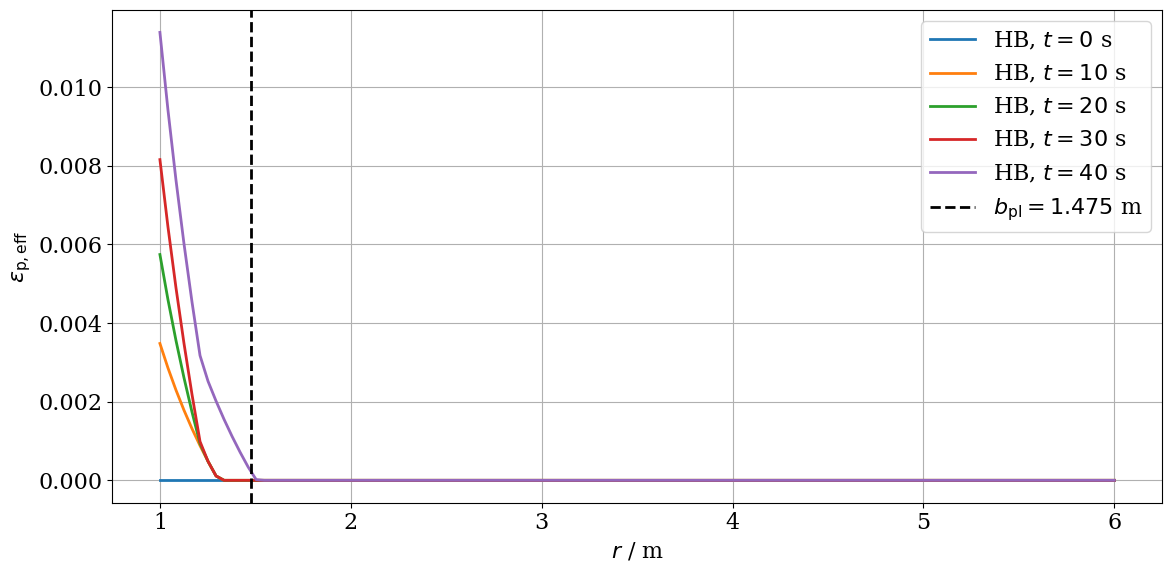

In [35]:
fig, ax = plt.subplots(figsize=(12, 6))
for i in [0, 10, 20, 30, 40]:
    ax.plot(
        np.array(raxis).T[0] / 1000,
        pvd_hb.read_set_data(i, "EquivalentPlasticStrain", pointsetarray=raxis),
        label=f"HB, $t = {i}$ s",
        ls="-",
    )

ax.axvline(
    x=analytResults_set["pl_range"],
    color="black",
    linestyle="--",
    label="$b_{{\\text{{pl}}}} = {:2.3f}$ m".format(analytResults_set["pl_range"]),
)

ax.set_xlabel("$r$ / m")
ax.set_ylabel("$\\epsilon_\\mathrm{p,eff}$")
ax.legend()
ax.grid("both")
fig.tight_layout()

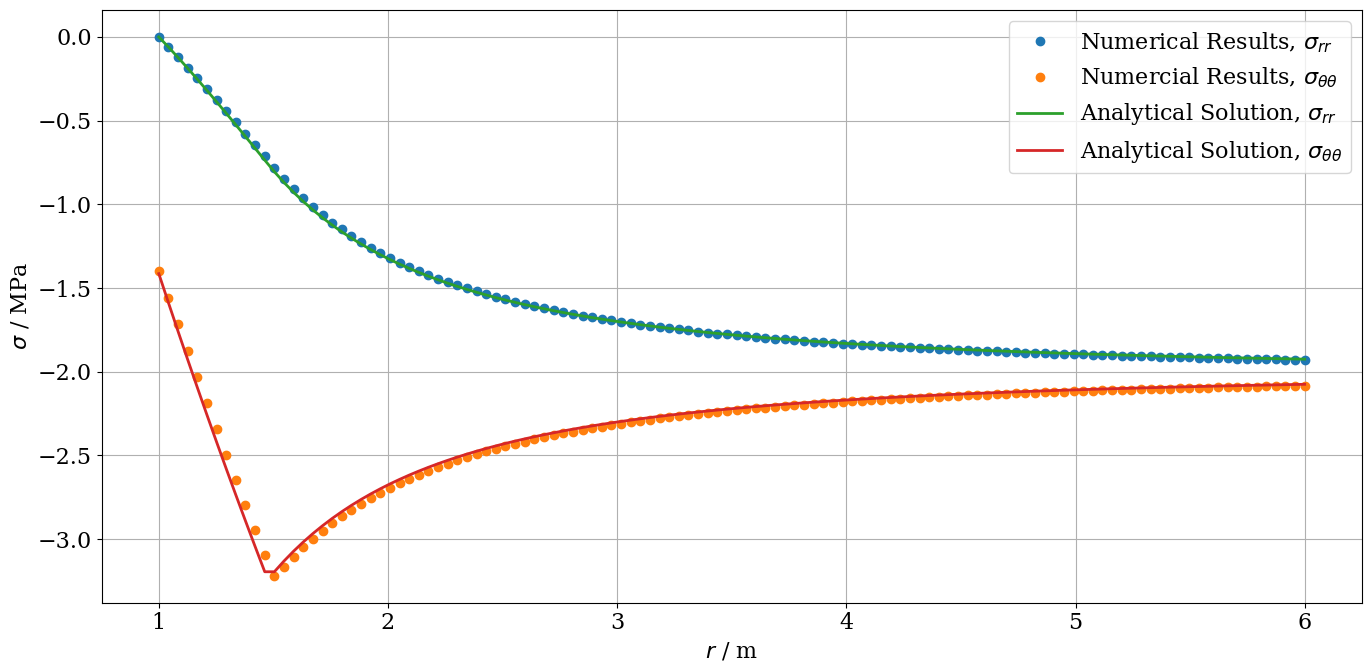

In [36]:
fig, ax = plt.subplots(figsize=(14, 7))
radData = np.array(raxis).T[0] / 1000
calData_stress_rr = pvd_hb.read_set_data(i, "sigma", pointsetarray=raxis).T[0]
calData_stress_tt = pvd_hb.read_set_data(i, "sigma", pointsetarray=raxis).T[2]
pd.DataFrame(
    {"rad": radData, "sigma_rr": calData_stress_rr, "sigma_tt": calData_stress_tt}
).to_csv(calFolder_name / "calculated_data_Ex5.csv", index=False)

ax.plot(
    np.array(raxis).T[0] / 1000,
    pvd_hb.read_set_data(i, "sigma", pointsetarray=raxis).T[0],
    label="Numerical Results, $\\sigma_{rr}$",
    ls="none",
    marker="o",
)
ax.plot(
    np.array(raxis).T[0] / 1000,
    pvd_hb.read_set_data(i, "sigma", pointsetarray=raxis).T[2],
    label="Numercial Results, $\\sigma_{\\theta\\theta}$",
    ls="none",
    marker="o",
)

ax.plot(
    analytResults_set["radius"][1:],
    analytResults_set["sig_rr"][1:] * -1.0,
    "-",
    label="Analytical Solution, $\\sigma_{rr}$",
)
ax.plot(
    analytResults_set["radius"][1:],
    analytResults_set["sig_tt"][1:] * -1.0,
    "-",
    label="Analytical Solution, $\\sigma_{\\theta\\theta}$",
)

ax.set_xlabel("$r$ / m")
ax.set_ylabel("$\\sigma$ / MPa")
ax.legend()
fig.tight_layout()
ax.grid("both")

Continue with the rest of the code. Mean Error: 6.885302341354659e-09


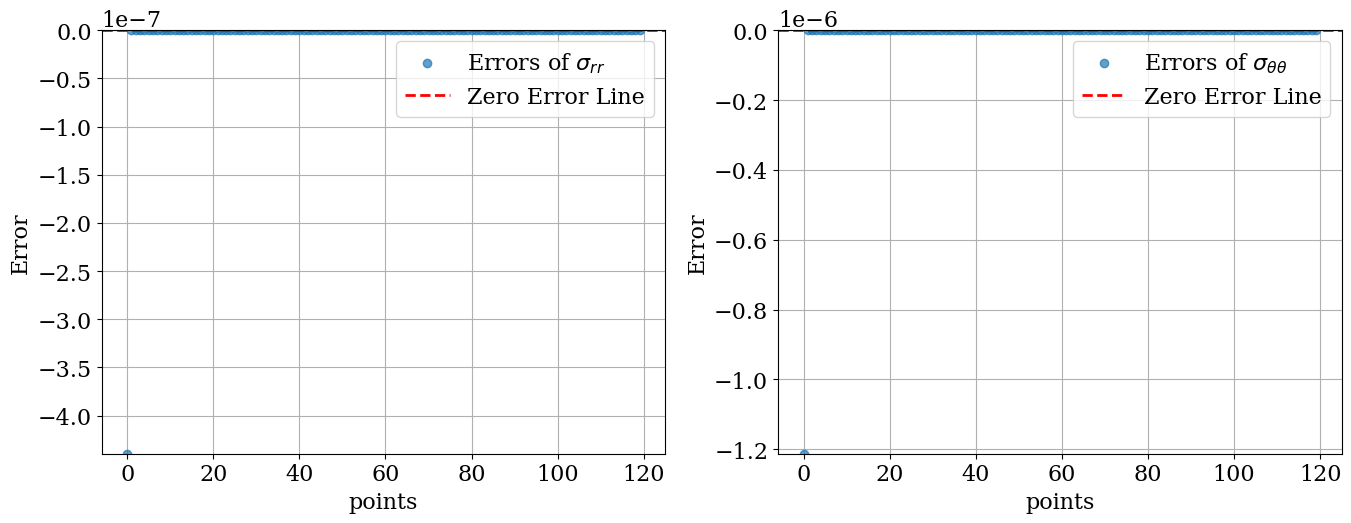

In [37]:
ErrorAnalysis(
    "reference_data_Ex5.csv",
    "calculated_data_Ex5.csv",
    "sigma_rr",
    "sigma_tt",
    r"Errors of $\sigma_{rr}$",
    "Errors of $\\sigma_{\\theta \\theta}$",
    tol=1e-6,
)

Continue with the rest of the code. Mean Error: 0.012070187784180824


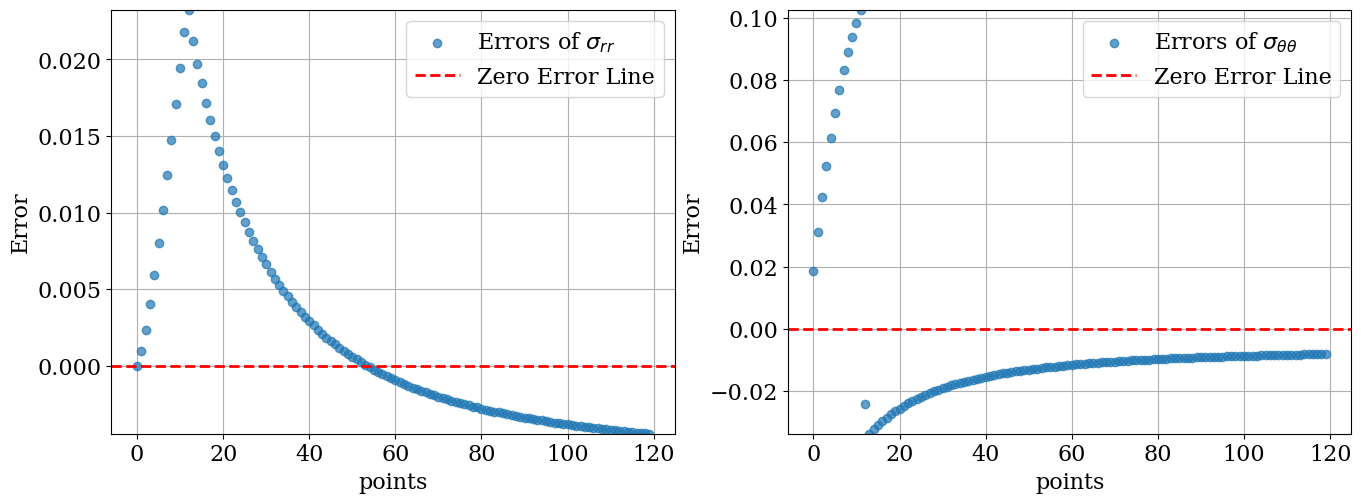

In [38]:
ErrorAnalysis(
    "reference_data_Ex5.csv",
    "analytical_data_Ex5.csv",
    "sigma_rr",
    "sigma_tt",
    r"Errors of $\sigma_{rr}$",
    "Errors of $\\sigma_{\\theta \\theta}$",
    tol=5e-1,
)

## References

[1] E. Hoek and E. T. Brown, “Empirical strength criterion for rock masses,” _Journal of the geotechnical engineering division_, vol. 106, no. 9, pp. 1013–1035, 1980.

[2] E. T. Brown and E. Hoek, _Underground excavations in rock_. CRC Press, 1980.

[3] E. Hoek, “Rock fracture under static stress conditions,” 1965.

[4] E. T. Brown, “Strength of models of rock with intermittent joints,” _Journal of the Soil Mechanics and Foundations Division_, vol. 96, no. 6, pp. 1935–1949, 1970.

[5] E. Hoek and E. Brown, “The Hoek–brown failure criterion and GSI – 2018 edition,” _Journal of Rock Mechanics and Geotechnical Engineering_, vol. 11, no. 3, pp. 445–463, 2019.

[6] Z. Bieniawski, “Classification of rock masses for engineering: the RMR system and future trends,” _Rock Testing and Site Characterization_, pp. 553–573, Elsevier, 1993.

[7] N. Barton, “Some new Q-value correlations to assist in site characterisation and tunnel design,” _International Journal of Rock Mechanics and Mining Sciences_, vol. 39, no. 2, pp. 185–216, 2002.

[8] E. Hoek, and Mark S Diederichs. "Empirical estimation of rock mass modulus." _International Journal of Rock Mechanics and Mining Sciences_ vol. 43, no. 2, pp. 203-215, 2006

[9] S. Sloan and J. Booker, “Removal of singularities in Tresca and Mohr-Coulomb yield functions,” _Communications in Applied Numerical Methods_, vol. 2, no. 2, pp. 173–179, 1986.

[10] A. Abbo, A. Lyamin, S. Sloan, and J. Hambleton, “A C2 continuous approximation to the Mohr–Coulomb yield surface,” _International Journal of Solids and Structures_, vol. 48, no. 21, pp. 3001–3010, 2011.

[11] T. Nagel, W. Minkley, N. Böttcher, and D. Naumov, “Implicit numerical integration and consistent linearization of inelastic constitutive models of rock salt, _Computers Structures_, vol. 182, pp. 87-103, 2017.

[12] R. Merifield, A. Lyamin, and S. Sloan, “Limit analysis solutions for the bearing capacity of rock masses using the generalised Hoek-Brown criterion,” _International Journal of Rock Mechanics and
Mining Sciences_, vol. 43, no. 6, pp. 920–937, 2006

[13] J. Clausen and L. Damkilde, “An exact implementation of the Hoek–Brown criterion for elasto-plastic finite element calculations,” _International Journal of Rock Mechanics and Mining Sciences_, vol. 45, no. 6, pp. 831–847, 2008.

[14] E. Hoek, "Practical Rock Engineering. 2007." _Online. ed. Rocscience_ (<https://www.rocscience.com/assets/resources/learning/hoek/Practical-Rock-Engineering-Chapter-11-Rock-Mass-Properties.pdf>), 2007.

[15] C. Carranza-Torres, C. Fairhurst, The elasto-plastic response of underground excavations in rock
masses that satisfy the Hoek-Brown failure criterion, _International Journal of Rock Mechanics and Mining Sciences_, vol. 36, pp. 77-809, 1999